#Thomas Jones - Homework2

##Common Imports

In [1]:
import pandas as pd
import numpy as np


##Dataset Load

Pull the data from github

In [2]:
import requests
import io
# # Load your dataset
url = 'https://raw.githubusercontent.com/wortcook/UMKC/refs/heads/main/Fall2024/CS5530-0005/hw2/diamonds_casestudy.csv'
s = requests.get(url).content
df = pd.read_csv(io.StringIO(s.decode('utf-8')))
df.head()

,carat,cut,color,clarity,depth,table,price,width,length,height
0,0.23,Ideal,E,SI2,61.5,55.0,326,3.95,3.98,2.43
1,0.21,Premium,E,SI1,59.8,61.0,326,3.89,3.84,2.31
2,0.23,Good,E,VS1,56.9,65.0,327,4.05,4.07,2.31
3,0.29,Premium,I,VS2,62.4,58.0,334,4.20,4.23,2.63
4,0.31,Good,J,SI2,63.3,58.0,335,4.34,4.35,2.75


##Data Cleaning
Determine missing values

In [3]:
#Check for na data
df.isnull().sum()

,0
carat,0
cut,0
color,0
clarity,0
depth,50
table,0
price,0
width,0
length,0
height,0


Because there are only 50 missing values in a single column we'll drop the data.

In [4]:
#drop missing data
df.dropna(inplace=True)
df.isnull().sum()


,0
carat,0
cut,0
color,0
clarity,0
depth,0
table,0
price,0
width,0
length,0
height,0


##Visualization

First, show the pairplot of all the data, we can do this because we have a limited number of features.

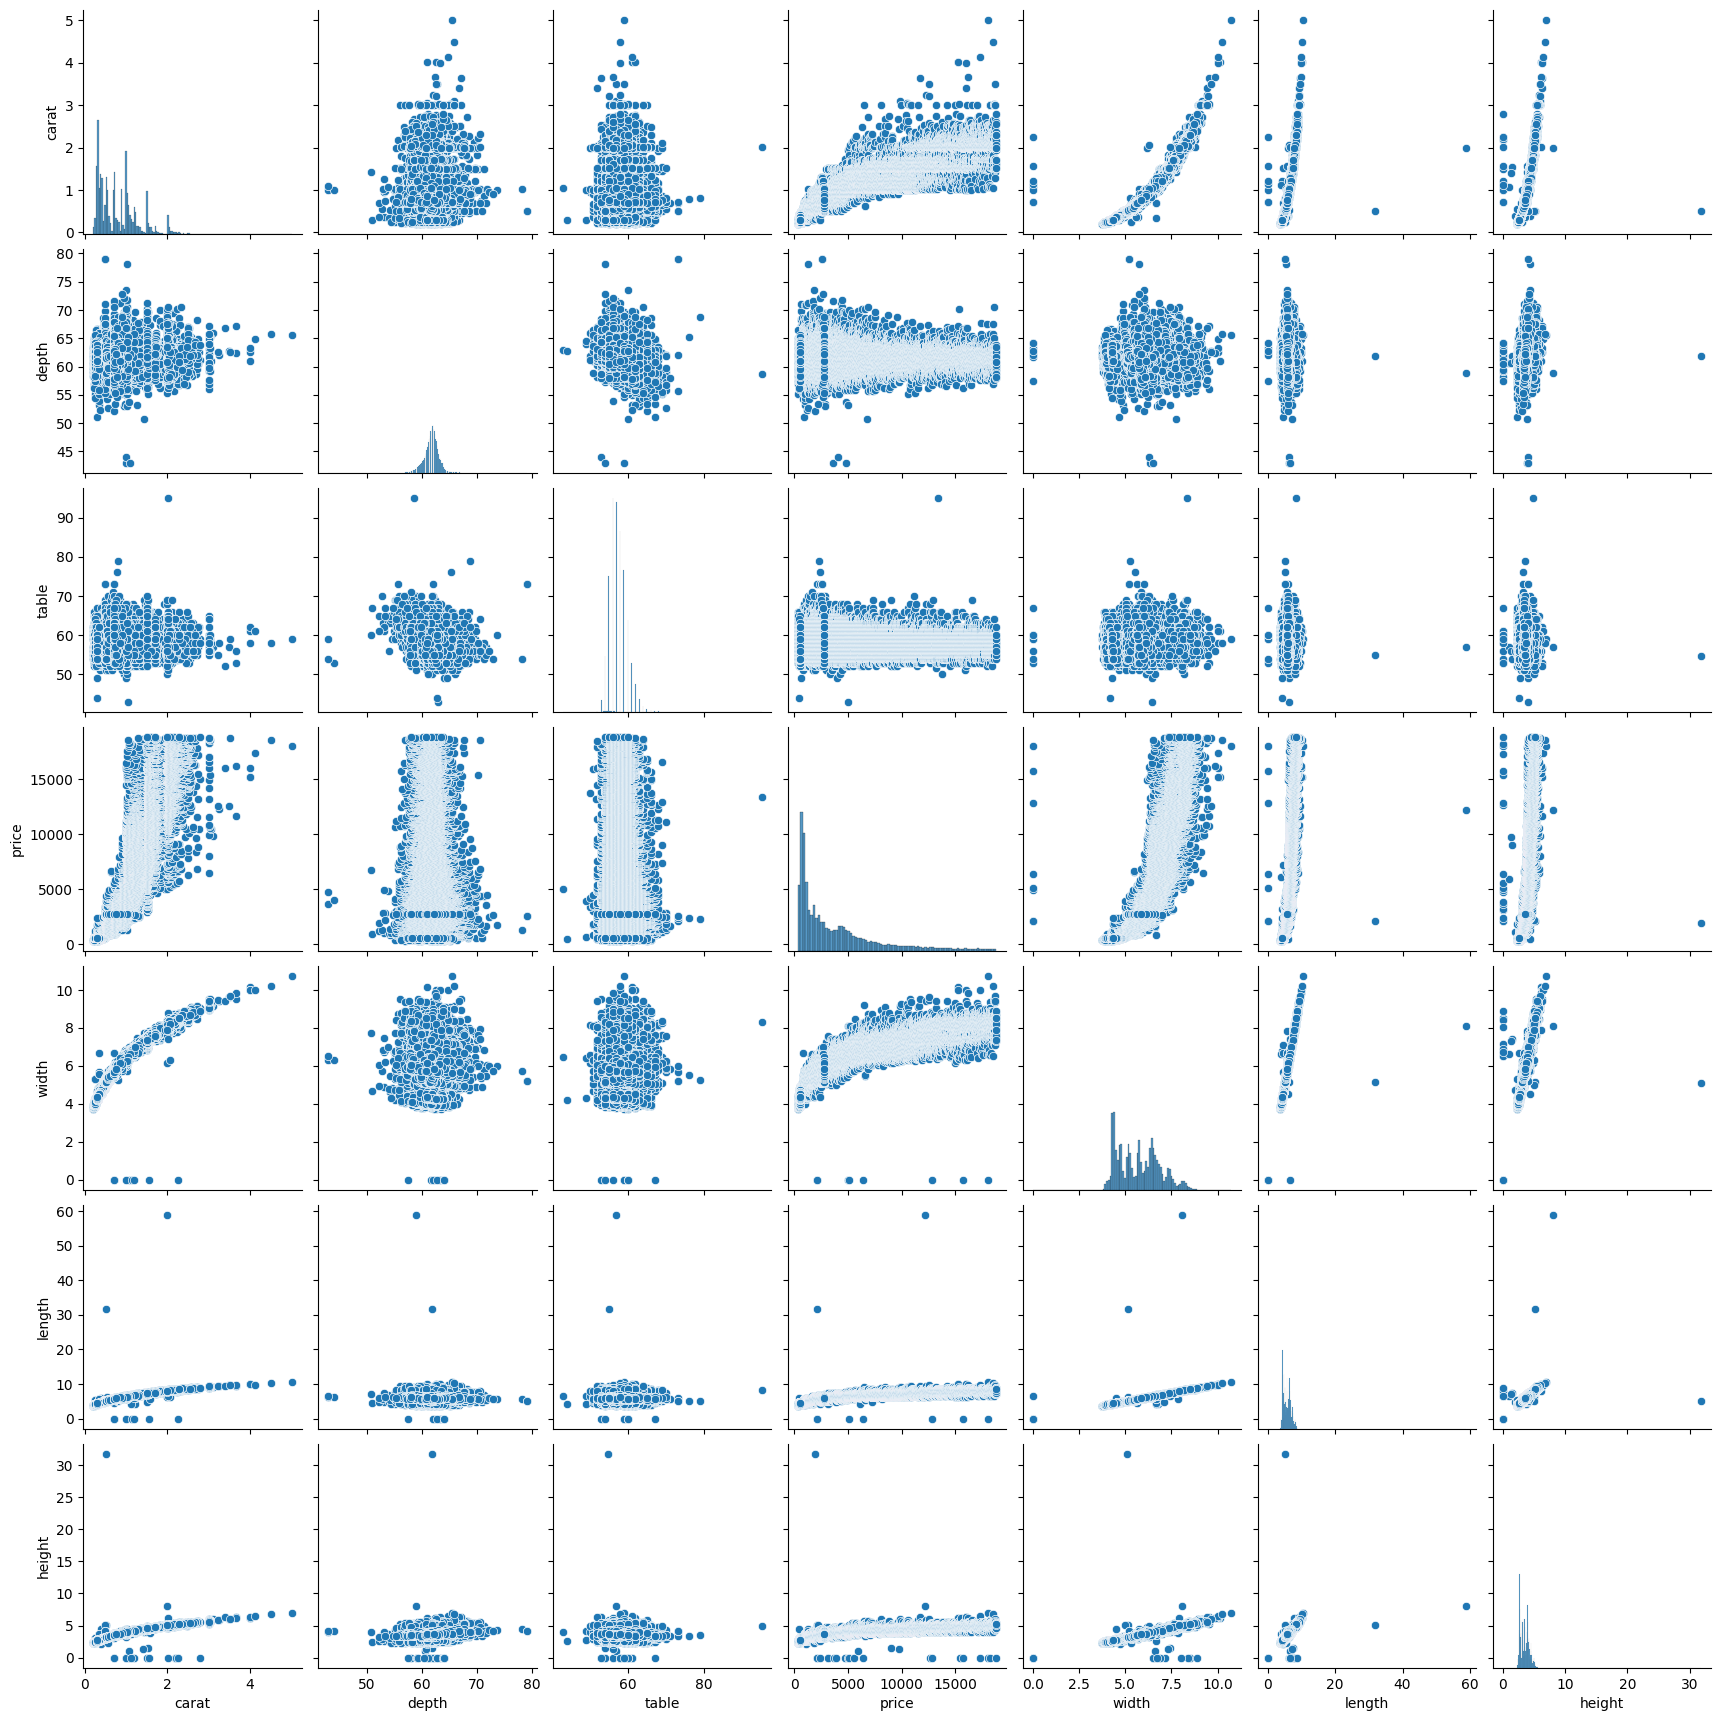

In [5]:
import seaborn as sns


sns.pairplot(df)


###Pairplot Discussion
From the pairplots above we see some trends that are worth exploring. One of the more obvious is carat vs price which we can see via a scatterplot. Visually there is a clear trend to the data, i.e. as carat increases so does price.

<Axes: xlabel='carat', ylabel='price'>

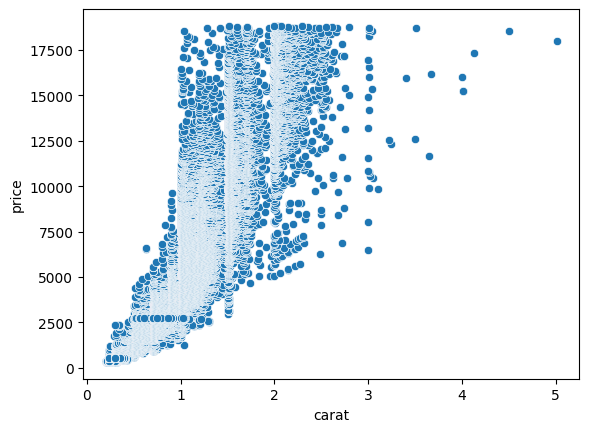

In [6]:
sns.scatterplot(data=df, x='carat', y='price')

##Normalize the data, this will help us look at the boxplot to manage outliers

<Axes: >

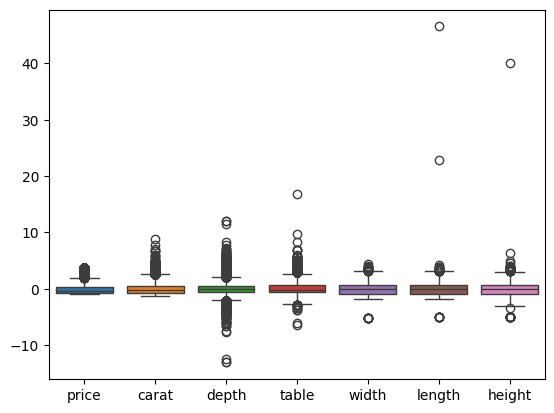

In [7]:
import sklearn.preprocessing as preprocessing
import matplotlib.pyplot as plt
import warnings
warnings.simplefilter(action='ignore', category=FutureWarning)

df_normalized = pd.DataFrame(
    preprocessing.StandardScaler().fit_transform(df[['price','carat', 'depth', 'table', 'width', 'length', 'height']]),
    columns=['price','carat', 'depth', 'table', 'width', 'length', 'height']
)
sns.boxplot(data=df_normalized)


##Boxplot normalized data

<Axes: >

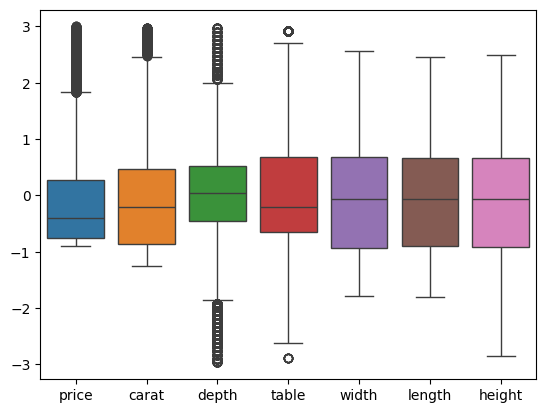

In [8]:
#drop any data outside of 3 standard deviation
df_normalized = df_normalized[(np.abs(df_normalized) < 3)]

#check for na
df_normalized.dropna(inplace=True)

sns.boxplot(data=df_normalized)

##Linear Regression - Normalized

In [9]:
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error as MSE

#Create new dataset
ml_predictors = df_normalized[['carat', 'depth', 'table', 'width', 'length', 'height']]
ml_target = df_normalized[['price']]

multiple_LR = LinearRegression()
multiple_LR.fit(ml_predictors, ml_target)

ml_predicted_price = multiple_LR.predict(ml_predictors)
ml_mse = MSE(ml_target, ml_predicted_price)
ml_r_sqrd = multiple_LR.score(ml_predictors, ml_target)

print('Intercept: ', multiple_LR.intercept_)
print('Coefficients: ', multiple_LR.coef_)
print('MSE: ',ml_mse)
print('R-Squared: ', ml_r_sqrd)


Intercept:  [-0.00808251]
Coefficients:  [[ 1.3794002  -0.031965   -0.04903365 -0.79702693  0.60990134 -0.27029438]]
MSE:  0.1010974487368273
R-Squared:  0.8637111431658955


We can see from the coefficients that price is:


*   Highly correlated with carat
*   Negatively correlated with depth, table, and width
*   Correlated with length
*   Negatively correlated with height

R^2 indicates a good percentage of the price variance is due to the input variables.

Given the mix of coefficients between height, width, and length plus the visualization of carat vs. price the polynomial regression may result in a better model.

##Polynomial Regression - Normalized

In [10]:
from sklearn.preprocessing import PolynomialFeatures

multiple_PR = PolynomialFeatures(degree=2, include_bias=False)
multiple_PR_X = multiple_PR.fit_transform(ml_predictors)

multiple_PR_LR = LinearRegression()
multiple_PR_LR.fit(multiple_PR_X, ml_target)

multiple_PR_predicted_price = multiple_PR_LR.predict(multiple_PR_X)
multiple_PR_mse = MSE(ml_target, multiple_PR_predicted_price)
multiple_PR_r_sqrd = multiple_PR_LR.score(multiple_PR_X, ml_target)

print('Intercept: ', multiple_PR_LR.intercept_)
print('Coefficients: ', multiple_PR_LR.coef_)
print('MSE: ',multiple_PR_mse)
print('R-Squared: ', multiple_PR_r_sqrd)


Intercept:  [-0.20133373]
Coefficients:  [[ 0.31553636 -0.0361133  -0.02467534 -0.28408084  0.53448772  0.29374105
  -1.02582931 -0.03311784  0.05101039  0.85888194 -0.32392136  1.36915267
   0.04239751  0.00482764  0.32513675  0.26968134 -0.56984663 -0.00321531
   0.0687124  -0.11640754 -0.0216242  -0.47061751  0.34111942 -0.78146107
   0.86001003 -0.64873255  0.09212905]]
MSE:  0.09332767002234868
R-Squared:  0.8741855346770682


The coefficients representing carat, carat^2, carat*depth, depth, depth^2, etc. are shown above. These coefficients are less interpreable than the linear model because of the additional complexities associated with polynomial models. The linear components can be interpreted as general trends though the other components are less clear.

##Linear Regression - Not Normalized

In [11]:
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error as MSE

#Create new dataset
ml_predictors = df[['carat', 'depth', 'table', 'width', 'length', 'height']]
ml_target = df[['price']]

multiple_LR = LinearRegression()
multiple_LR.fit(ml_predictors, ml_target)

ml_predicted_price = multiple_LR.predict(ml_predictors)
ml_mse = MSE(ml_target, ml_predicted_price)
ml_r_sqrd = multiple_LR.score(ml_predictors, ml_target)

print('Intercept: ', multiple_LR.intercept_)
print('Coefficients: ', multiple_LR.coef_)
print('MSE: ',ml_mse)
print('R-Squared: ', ml_r_sqrd)


Intercept:  [20870.40521917]
Coefficients:  [[10705.57270327  -203.17229766  -102.32757836 -1322.34484989
     65.55768089    41.87008978]]
MSE:  2236914.5838462496
R-Squared:  0.8593970746575113


##Polynomial Regression - Not Normalized

In [12]:
from sklearn.preprocessing import PolynomialFeatures

multiple_PR = PolynomialFeatures(degree=2, include_bias=False)
multiple_PR_X = multiple_PR.fit_transform(ml_predictors)

multiple_PR_LR = LinearRegression()
multiple_PR_LR.fit(multiple_PR_X, ml_target)

multiple_PR_predicted_price = multiple_PR_LR.predict(multiple_PR_X)
multiple_PR_mse = MSE(ml_target, multiple_PR_predicted_price)
multiple_PR_r_sqrd = multiple_PR_LR.score(multiple_PR_X, ml_target)

print('Intercept: ', multiple_PR_LR.intercept_)
print('Coefficients: ', multiple_PR_LR.coef_)
print('MSE: ',multiple_PR_mse)
print('R-Squared: ', multiple_PR_r_sqrd)


Intercept:  [-37075.38781693]
Coefficients:  [[ 1.04137503e+04  1.13742386e+03  2.29427511e+02 -2.96034349e+04
   3.52755880e+04 -1.08728389e+04 -4.35571459e+03 -1.16817230e+02
   1.26811749e+01  5.28490947e+02  3.04165448e+03 -2.32349643e+03
  -6.00960392e+00 -4.59061400e+00  3.41977634e+02 -1.97398951e+02
  -2.65792232e+02  2.10350137e+00  2.22099366e+02 -4.39618656e+02
   2.76420277e+02  1.29733960e+03 -1.85080820e+03 -3.22733767e+03
  -4.76685432e+02  5.22153744e+03  8.61852381e+01]]
MSE:  1968231.1243122893
R-Squared:  0.8762853727956809
